ОСНОВНЫЕ ТИПЫ ВИЗУАЛИЗАЦИИ:
1.линейный график;
2.гистограмма;
3.диаграмма рассеяния;
4.коробчатая диаграмма;
5.круговая диаграмма;
6.столбчатая диаграмма;
7.тепловая карта.

## Линейный график

Линейный график представляет собой последовательность точек, соединённых линией. Каждая точка — это пара координат x и y, которые отображены по осям абсцисс и ординат (в двумерном случае). 

На практике, в Data Science такие графики чаще всего используются для визуализации временных рядов, например чтобы отследить динамику продаж во времени, число активных пользователей по дням, изменение курса валют и акций.

График бывает особенно полезен, когда вы пытаетесь спрогнозировать ряд и вам необходимо увидеть свой прогноз на графике и сравнить его с действительностью.

Несмотря на свою простоту, при правильном применении линейный график может быть очень информативным и полезным: он позволяет выявить тенденцию движения показателя и найти ключевые точки его роста или падения.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

ModuleNotFoundError: No module named 'seaborn'

Из графика отчётливо виден рост числа продаж видеоигр по всем рынкам примерно до 2007 года, после чего наблюдается резкий спад и неизбежное приближение числа продаж к 0 в 2020 году. Вполне объяснимое явление: именно в этот период наступает эра интернет-магазинов видеоигр и люди постепенно уходят от дисковых накопителей.

На графике можно отследить лидеров продаж, то, как они менялись, какие страны влияют на общие продажи, где абсолютный и относительный прирост продаж в динамике выше, а где — ниже.

## Гистограмма

Гистограмма — это способ визуализации частоты попадания признака в некоторый численный интервал. Гистограмма состоит из прямоугольников, расположенных вдоль оси x.

Ось разбита на интервалы, их ещё называют корзинами (bins), их число задаётся пользователем. Ширина интервалов одинакова и задаёт ширину прямоугольника.

По оси y откладывается высота прямоугольника — количество наблюдений, которые попали в интервал. Чем выше столбик, тем больше наблюдений находятся в интервале.

Гистограммы часто используются для оценки распределения числового признака, например мы можем понять, как распределены цены на товары, число шагов, которые делает пользователь умных часов, масса метеоритов, падающих на землю.

Ниже приведено два вида гистограмм с общей осью.

Верхняя гистограмма описывает общее распределение стоимости недвижимости в Мельбурне. Весь диапазон цен разбит на 30 равных интервалов. На каждом интервале строится прямоугольник, его высота — число объектов, стоимость которых лежит в этом интервале.

Нижняя гистограмма описывает то же распределение, но с учётом типов недвижимости. Здесь число объектов, попавших в корзину, обозначается интенсивностью цвета: чем темнее полоса, тем больше в данных объектов с ценой из этого интервала.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')

Во-первых, основная часть цен на объекты сосредоточена в интервале от  0.1 до 2 млн, и наибольшее число цен лежит в интервале от 0.9 до 1.2 млн (самый высокий прямоугольник). Далее при повышении цены количество объектов только падает, что вполне соответствует жизненным реалиям — дорогих и роскошных домов гораздо меньше, чем домов среднего ценового сегмента. Забегая вперёд, в тему теории вероятности, скажем, что данная гистограмма очень напоминает логарифмическое нормальное распределение. Такой вид распределения очень распространён на практике.

Во-вторых, как видно из нижней гистограммы, объекты типа house (h) имеют схожее с общим распределение — их максимальная частота также наблюдается в третьем интервале, после чего идёт постепенное падение частоты (бледные полосы на высоких значениях цен). Цены на объекты типов unit (u) не превышают 4 млн, и их максимум наблюдается во втором интервале. Таунхаусы (t) имеют почти одинаковую частоту в каждом ценовом сегменте.

## ДИАГРАММА РАССЕЯНИЯ (SCATTERPLOT)

Другое название этого графика — точечная диаграмма.

График представляет собой облака точек: по оси абсцисс откладывается одна числовая переменная, по оси ординат — вторая, а каждая точка на графике — это запись из таблицы.

Диаграммы рассеяния являются стандартным средством визуализации связи между двумя числовыми переменными. Однако через настройки графика в исследование зависимости можно добавить и несколько категориальных переменных.

Диаграммы рассеяния являются мощным инструментом, который очень широко используется в Data Science. С их помощью мы можем увидеть, как зависит (или не зависит) давление от возраста пациента, объём продаж товаров от количества показанной рекламы и т. д.

Оценив взаимосвязь признаков, мы можем принять решение об использовании какого-то из признаков для предсказания.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина крыльев')

## КРУГОВАЯ ДИАГРАММА (PIE CHART)

Cинонимичные названия диаграммы — пироговая диаграмма и секторная диаграмма.

Круговая диаграмма представляет собой круг, разделённый на секторы. Весь круг составляет 100 %. Каждый из секторов отображает долю одной из категорий в данных, размер сектора соответствует части целого от круга.

Диаграмма является способом визуализации для категориального признака: например, можно визуализировать и сравнивать доли от выручки, которые делает каждый продавец. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

game_of_thrones_df = pd.read_csv('data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

## Столбчатая диаграмма

Столбчатая диаграмма также максимально проста: по оси x откладывается некоторый категориальный признак, для каждой категории которого рассчитан некоторый показатель (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение этого показателя. 

Основное применение столбчатых диаграмм в Data Science — сравнение категорий друг с другом. Например, сравнение ресторанов по суммарной прибыли, сравнение средних расходов пользователей, сравнение медианной стоимости квартир по районам и т. д.

Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать совместное распределение показателей, тем самым повышая информативность. Такие диаграммы называются многоуровневыми.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

## Тепловая карта

ТЕПЛОВАЯ КАРТА (HEATMAP)

Тепловая карта — это графическое представление некоторой таблицы, где значения в ячейках выделяются определённым цветом или интенсивностью цвета. Таблицей может быть как DataFrame, так и, например, изображение.

Способы применения тепловых карт разнообразны: от визуализации категорий объектов на изображениях до графического представления матриц.

При исследовании табличных данных тепловые карты чаще всего применяются для визуализации сводных таблиц.

При исследовании табличных данных тепловые карты чаще всего применяются для визуализации сводных таблиц.

## Коробчатая диаграмма

Синонимичные названия диаграммы — ящик с усами и диаграмма размаха.

Коробчатые диаграммы, которые были введены в употребление Джоном Тьюки в 1977 году, являются новым типом диаграмм для исследования распределения числового признака по отношению к предыдущим. Диаграмма основана на понятии квантилей.

Приведём общую схему построения диаграммы:

Img

Для построения коробчатой диаграммы надо знать три характеристики:

 — 25 % квантиль;
 — 50 % квантиль, или медиана;
 — 75 % квантиль.
Основные составляющие графика:

1
Ящик, или коробка. Левая граница коробки соответствует значению , правая — , а линия внутри коробки — медиане. Ширина ящика называется межквартильным размахом (Interquartile range) и вычисляется как .

2
Усы ящика, длина которых равна . Крайние точки усов часто обозначаются в литературе как min и max и называются границами распределения. Фактически эти точки не всегда являются истинными минимумом и максимумом признака.

3
Потенциальные выбросы — точки, лежащие за пределами границ.

Согласно теории Тьюки, эти точки следует считать аномалиями и они подлежат исключению из данных. Однако на практике так бывает не всегда, и необходимо проводить дополнительное исследование. Об этом мы будем говорить подробнее в модуле по очистке данных.

Коробчатые диаграммы часто используются для поиска потенциальных выбросов в данных, а также для сравнения показателей нескольких распределений друг с другом: например, можно визуально сравнить медианные стоимости товаров разных магазинов или размах цен на квартиры в районах Москвы (размеры ящиков).

Коробчатые диаграммы часто являются более совершенными аналогами гистограмм.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя')

ModuleNotFoundError: No module named 'seaborn'

## ОСНОВНЫЕ ОБЪЕКТЫ MATPLOTLIB

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — объектно-ориентированный режим. Он основан на работе с объектами фигур (figure, их ещё называют канвасами или холстами) и координатных плоскостей (axes, или системы координат). 

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

На самом деле мы с вами уже использовали Matplotlib — встроенная визуализация в Pandas полностью основана на данной библиотеке. Однако визуализация в Matplotlib не ограничивается только DataFrame: c помощью Matplotlib можно визуализировать любые последовательности (списки, словари, NumPy-массивы).

→ К тому же инструментарий библиотеки поможет вам расширить ваши возможности визуализации, управляя параметрами настройки графиков вручную.

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — объектно-ориентированный режим. Он основан на работе с объектами фигур (figure, их ещё называют канвасами или холстами) и координатных плоскостей (axes, или системы координат). 

На рисунке ниже представлена визуализация основных компонентов графика в Matplotlib:

Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

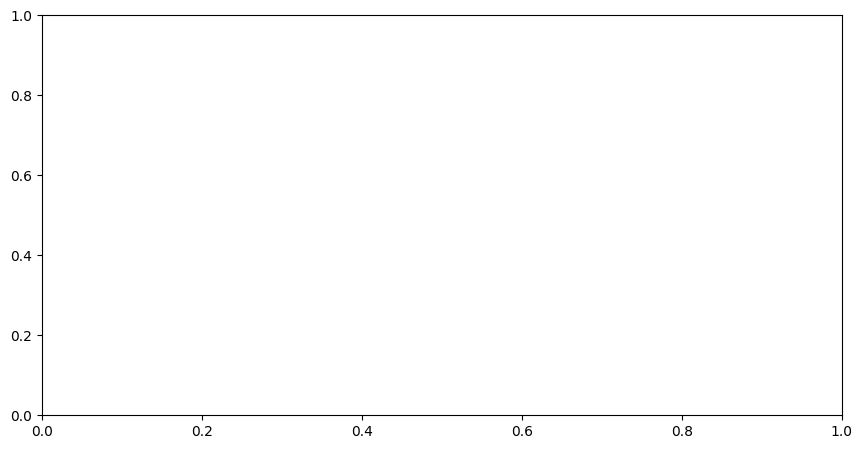

In [ ]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

Теперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод scatter().

У объекта координатной плоскости axes вызовем метод scatter().

Основные параметры метода scatter()

x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
s — размер маркеров;
marker — вид маркеров ('o' — точки, '^' — треугольники);
c — цвет маркеров.

На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

In [ ]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue')

NameError: name 'covid_df' is not defined